In [1]:
#Loading an image
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
data = np.load("/mnt/data/doom_data_training/obs_data_doomrnn_0.npy")
one_image = data[9][154]
plt.imshow(one_image)
#plt.plot()
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

/home/kaiolae/code/word_models_keras_test/WorldModels


3
6 ,  217
prev:  6 . current: 2
6 ,  249
prev:  2 . current: 7
7 ,  396
prev:  6 . current: 1
11 ,  503
prev:  7 . current: 3
36 ,  793
prev:  9 . current: 2
36 ,  810
prev:  5 . current: 9
42 ,  693
prev:  9 . current: 2
47 ,  233
prev:  4 . current: 0
72 ,  269
prev:  4 . current: 0
73 ,  246
prev:  5 . current: 1
78 ,  127
prev:  5 . current: 1
86 ,  512
prev:  7 . current: 2
90 ,  344
prev:  6 . current: 1
98 ,  293
prev:  3 . current: 7
105 ,  577
prev:  6 . current: 2
127 ,  121
prev:  5 . current: 1
139 ,  184
prev:  5 . current: 1
142 ,  133
prev:  5 . current: 1
151 ,  358
prev:  5 . current: 1
155 ,  664
prev:  8 . current: 3
176 ,  316
prev:  7 . current: 1
179 ,  231
prev:  5 . current: 1
183 ,  141
prev:  5 . current: 1
189 ,  255
prev:  5 . current: 1


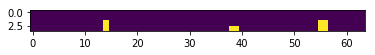

In [33]:
import count_monsters_and_balls
from scipy import ndimage
img = data[0][0]
plt.imshow(img)
img=img/256
count, thresh = count_monsters_and_balls.count_monsters(img)
print(count)
plt.imshow(thresh)
rcount = 0
icount = 0
for rollout in data:
    icount=0
    
    prevcount = -1
    for img in rollout:
        img=img/256
        c=count_monsters_and_balls.count_monsters(img)[0]
        #print(rcount, ", ", icount)
        #print(count_monsters_and_balls.count_monsters(img)[0])
        
        if prevcount!=-1 and abs(prevcount-c) > 3:
            
            print(rcount, ", ", icount)
            print("prev: ", prevcount, ". current:", c)
        icount+=1
        prevcount = c
    rcount+=1

9

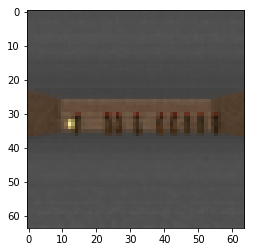

In [36]:
#Good fig for showing ability: img=data[36][918]
img=data[36][811]
plt.imshow(img)
img=img/256
count_monsters_and_balls.count_monsters(img)[0]

## Measuring if there is an explosion

In [ ]:
#data[3][208] is a good example of before/after explosion
FIREBALL_THRESHOLD = 0.65
from skimage import io, filters, color, measure
from scipy import ndimage
one_image = data[3][208]
plt.imshow(one_image)
plt.axis('off')

In [ ]:
#First, we take off the top half of the image, because only explosions spread this high.
top_half = one_image[:28, :, :]
plt.imshow(top_half)
plt.axis('off')

In [ ]:
top_half=one_image[:28,:,:]
top_half = color.rgb2gray(top_half)
thresholded_image = ndimage.binary_fill_holes(top_half>FIREBALL_THRESHOLD)


plt.imshow(thresholded_image)
plt.axis('off')

## Measuring if there is a fireball

In [ ]:
one_image = data[88][202]
plt.imshow(one_image)
plt.axis('off')

In [ ]:
#Thresholding
one_image=color.rgb2gray(one_image)
thresholded_image = ndimage.binary_fill_holes(one_image>FIREBALL_THRESHOLD)


plt.imshow(thresholded_image)
plt.axis('off')

object_labels = measure.label(thresholded_image)
print("Number of connected objects: ", object_labels.max())

## Counting Monsters

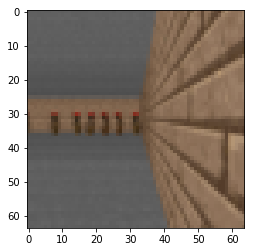

In [42]:
one_image = data[36][518]
plt.imshow(one_image)

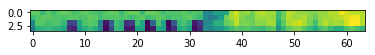

In [43]:
one_image = one_image[28:32,:,:]
one_image = one_image[:,:,1]#color.rgb2gray(one_image)
plt.imshow(one_image)

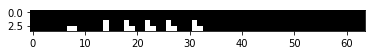

NameError: name 'measure' is not defined

In [44]:
#Threshold image indicates that monsters are probably below 0.22. Testing that as a negative threshold.
neg_thresh = 0.2*256 #Found by experimentation.
binary_black = ndimage.binary_fill_holes(one_image<neg_thresh)
plt.imshow(binary_black, cmap='gray')
plt.show()
labels = measure.label(binary_black)
print("Counted monsters: ", labels.max())

In [ ]:
#Counting monsters
monsters = ndimage.binary_fill_holes(binary_black > 0.5)
plt.imshow(monsters, cmap='gray')
labels = measure.label(monsters)
print(labels.max())

In [ ]:
#Counting fireballs
balls = ndimage.binary_fill_holes(binary > 0.5)
plt.imshow(balls, cmap='gray')
ball_labels = measure.label(balls)
print(ball_labels.max())

In [ ]:
#Testing if there is a wall. 
val = 0.39 #A threshold where walls are above, rest of scene (except fireballs) are typically below.
binary = im>val
#plt.imshow(binary, cmap='gray')
print(im.shape)
left_img = im[:, :32]
right_img = im[:, 32:]
left_img_binary = left_img>val
right_img_binary = right_img>val
left_img_above_thresh = np.count_nonzero(left_img_binary)
right_img_above_thresh = np.count_nonzero(right_img_binary)
plt.imshow(left_img)
plt.show()

In [ ]:
#Testing my external library
from count_monsters_and_balls import count_monsters, count_fireballs
print(count_fireballs(one_image))
print(count_monsters(one_image))

## Classifying if we are in explosion-mode or not

In [ ]:
#Loading an image
import numpy as np
import matplotlib.pyplot as plt
data = np.load("/home/kaiolae/code/word_models_keras_test/WorldModels/data_small_episodes/obs_data_doomrnn_1.npy")
explosion_image = data[9][162] #Image 22 from first rollout
plt.imshow(explosion_image) 
#plt.plot()


In [ ]:
# Measure Creativity by counting objects.
#Idea: Threshold the image. Count fireballs. Then threshold the INVERSE image, count monsters.
from skimage import io, filters, color, measure
from scipy import ndimage
import matplotlib.pyplot as plt

im = color.rgb2gray(explosion_image)
val = filters.threshold_otsu(im)
print(val)
plt.hist(im.ravel(), bins=256)
plt.axvline(val, color='r') #Showing the image histogram and the adaptive threshold
plt.show()

In [ ]:
#As seen above, almost all pixels are below 0.4 Testing that as threshold. It captures all fireballs.
val = 0.4
binary = im>val
#drops = ndimage.binary_fill_holes(im < val)
#plt.imshow(drops, cmap='gray')
plt.imshow(binary, cmap='gray')
plt.show()

In [ ]:
total_num_pixels = 64*64
ten_percent_of_pixels = 0.1*total_num_pixels
np.sum(binary)
print(ten_percent_of_pixels)
print("Sum binary: ", np.sum(binary))
if np.sum(binary) > ten_percent_of_pixels:
    print("We have an explosion")

In [ ]:
import os
import sys
#Adding WorldModels path to pythonpath
nb_dir = os.path.split(os.getcwd())[0]
print(nb_dir)
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

#Testing the implemenetion of explosion-detector
from count_monsters_and_balls import is_there_a_big_explosion
#print(is_there_a_big_explosion(one_image, 0.5))
print(is_there_a_big_explosion(explosion_image,0.5))
plt.imshow(explosion_image)


In [ ]:
from test_creativity_stability import count_events_from_images
image_data = count_events_from_images(data[9])
print("Num img without explosion: ", len(image_data["without_explosion"]))
print("Num img with explosion: ", len(image_data["with_explosion"]))

In [ ]:
print("Images with explosion: ")
for img in image_data["with_explosion"]:
    plt.figure()
    plt.imshow(img)

In [ ]:
print("Images without explosion: ")
for img in image_data["without_explosion"]:
    plt.figure()
    plt.imshow(img)

In [ ]:
#Testing automatic wall detection
#Wall has gray-color near 0.46. Floor/ceiling is near 0.36. Setting threshold 0.41.
img_without_wall = data[9][0] #Image 22 from first rollout
plt.imshow(img_without_wall)
im = color.rgb2gray(img_without_wall)
print(img_without_wall[0,0,0])

In [ ]:
#Testing automatic wall detection
#Wall has gray-color near 0.46. Floor/ceiling is near 0.36. Setting threshold 0.41.
img_with_left_wall = data[3][208] #Image 22 from first rollout
plt.imshow(img_with_left_wall)
im = color.rgb2gray(img_with_left_wall)
print(img_with_left_wall.shape)
print(img_with_left_wall[0,-1,0])

In [ ]:
from count_monsters_and_balls import is_there_a_lefthand_wall, is_there_a_righthand_wall
print(is_there_a_lefthand_wall(img_with_left_wall, 95))
print(is_there_a_righthand_wall(img_with_left_wall, 95))

In [ ]:
left_wall_pictures = []
right_wall_pictures = []
no_wall_pictures = []
wall_threshold = 100
for img in data[7]: #9
    if is_there_a_lefthand_wall(img, wall_threshold):
        left_wall_pictures.append(img)
    elif is_there_a_righthand_wall(img, wall_threshold):
        right_wall_pictures.append(img)
    else:
        no_wall_pictures.append(img)
    
plot_movie_mp4(no_wall_pictures)

In [ ]:
plot_movie_mp4(left_wall_pictures)

In [ ]:
plot_movie_mp4(right_wall_pictures)